In [58]:
import itertools

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import math

In [59]:
def pointInEquation(X,Y):
  
  r_1=math.sqrt(Y**2+X**2)
  theta=2*math.atan(Y/(r_1+X))

  r_2=800*math.sin(3*theta)
  

  return (math.floor(r_1/10)==math.floor(r_2/10))*1

def getPropellerValues(m,speed):
    rads = np.arange(0, ( np.pi), 0.01)
    values = []
    for theta in rads:
        r=128*math.sin(3*theta+6*(m/1000)*math.pi*speed)
        values.append((round(r*math.sin(theta),0),round(r*math.cos(theta),0)))
    return values
def drawPropellerWithAlliasing(i,l,speed,fps):
    img_X=256
    img_Y=256
    start_line=int(img_Y/2)
    line_reading_time=(1/(fps*(img_Y/l)))*1000

    act_time=i
    snapshot=[]
    while(start_line>=-img_Y/2):
        propeller_values=getPropellerValues(act_time,speed) #aktualne wartości wiatraczka
        for pixel_Y in range(start_line,min(start_line+l,img_Y),1):
            for pixel_X in range(int(-img_X/2),int(img_X/2),1) :
                if (pixel_X,pixel_Y) in propeller_values:
                    snapshot.append((pixel_X,pixel_Y))
        start_line=start_line-l
        act_time=act_time+line_reading_time
    return snapshot

In [60]:
def drawPropellerWithAlliasingDrawingSteps(i,l,speed,fps):
    img_X=256
    img_Y=256
    start_line=int(img_Y/2)
    line_reading_time=(1/(fps*(img_Y/l)))*1000

    act_time=i
    snapshot=[]
    animation=[]
    while(start_line>=-img_Y/2):
        propeller_values=getPropellerValues(act_time,speed) #aktualne wartości wiatraczka
        for pixel_Y in range(start_line,min(start_line+l,img_Y),1):
            for pixel_X in range(int(-img_X/2),int(img_X/2),1) :
                if (pixel_X,pixel_Y) in propeller_values:
                    snapshot.append((pixel_X,pixel_Y))
        start_line=start_line-l
        act_time=act_time+line_reading_time
        animation.append(snapshot[:])
    return animation

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\firat_d\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\firat_d\AppData\Local\Temp\ipykernel_22608\247954855.py", line 25, in <module>
    ani.save('scatter.gif', writer='pillow')
  File "c:\Users\firat_d\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\animation.py", line 1081, in save
    anim._draw_next_frame(d, blit=False)
  File "c:\Users\firat_d\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\animation.py", line 1116, in _draw_next_frame
    self._draw_frame(framedata)
  File "c:\Users\firat_d\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\animation.py", line 1743, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\firat_d\AppData\Local\Tem

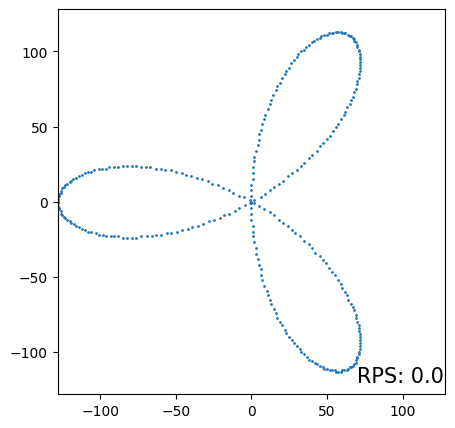

In [61]:


# set parameters
seconds=18
fps=30
frames = fps*seconds
rps=1
interval=1000/fps



fig, ax = plt.subplots(figsize=(5,5))
plt.xlim(0, 60)
plt.ylim(0, 60)
def update(i):
    # clear the axis each frame
    ax.clear()
    # replot things
    
    ax.scatter(*zip(*drawPropellerWithAlliasing(i*interval,1,(i/(30*3)),fps=fps)),s=1)
    ax.text(70,-120,"RPS: " + str((i/(30))), fontsize=15)
    ax.set_xlim((-128,128))
    ax.set_ylim((-128,128))


ani = animation.FuncAnimation(fig, update, frames=frames, interval=interval)
ani.save('scatter.gif', writer='pillow')

In [63]:
l=1
animation_frames=drawPropellerWithAlliasingDrawingSteps(220,l,5,fps=fps)

257


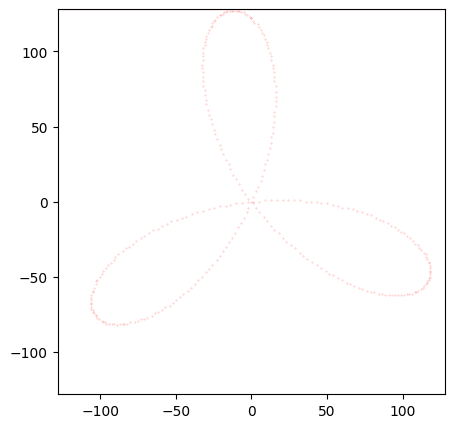

In [66]:
seconds=18
fps=30

frames =len(animation_frames)
rps=1
interval=1
print(frames)
line_reading_time=(1/(fps*(256/l)))*1000

fig, ax = plt.subplots(figsize=(5,5))
plt.xlim(0, 60)
plt.ylim(0, 60)
def update(i):
    # clear the axis each frame
    ax.clear()
    # replot things
    if (len(animation_frames[i])):
        ax.scatter(*zip(*animation_frames[i]),s=1)
    ax.scatter(*zip(*getPropellerValues(220+(i*line_reading_time),5)),s=0.1,c="red",alpha=0.3)
    plt.axhline(y = 128-i, color = 'r', linestyle = '-')

    ax.set_xlim((-128,128))
    ax.set_ylim((-128,128))


ani = animation.FuncAnimation(fig, update, frames=frames, interval=interval)
ani.save('scatter.gif', writer='pillow')